# Examples of XAI-Lib Usage for image data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Data and Model Loading

In [2]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(data_home = "./datasets/", subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(data_home = "./datasets/", subset='test', categories=categories)
class_names = ['atheism', 'christian']

In [3]:
print(newsgroups_test.data[0])

From: crackle!dabbott@munnari.oz.au (NAME)
Subject: "Why I am not Bertrand Russell" (2nd request)
Reply-To: dabbott@augean.eleceng.adelaide.edu.au (Derek Abbott)
Organization: Electrical & Electronic Eng., University of Adelaide
Lines: 4

Could the guy who wrote the article "Why I am not Bertrand Russell"
resend me a copy?

Sorry, I accidently deleted my copy and forgot your name.



In [4]:
model = pickle.load(open('models/text_rf.pickle','rb'))
print(model.predict_proba([newsgroups_test.data[0]]))

[[0.29 0.71]]


## LIME

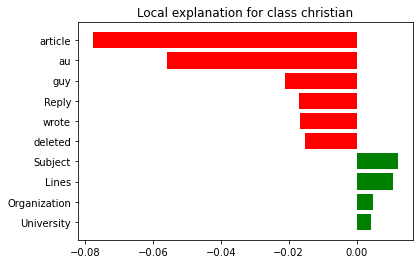

In [30]:
from xailib.explainers.lime_explainer import LimeXAITextExplainer

# index of the sentence to explain
idx = 0

# 1) Create the Explainer
lm = LimeXAITextExplainer(model)

# 2a) Fit the Explainer
lm.fit(class_names)

# 2b) Create custom classifier function if not predict 
# function that takes as input text and return an array of (num_samples,num_classes)
# If None will use black_box.predict function
def classifier_fn(sentences):
    return model.predict_proba(sentences)

# 3) Explain an Instance
explanation = lm.explain(newsgroups_test.data[idx], classifier_fn, num_samples=500, plot=True)